In [49]:
import pandas as pd
import geopandas as gpd
import contextily as cx
from functions import *

Load dataset with tourism score

In [50]:
df = pd.read_parquet('datasets/model_data.parquet')

In [51]:
# keep only listings for 2024
df = df[df['year'] == 2024]

# select variables
vars_to_keep = [
    'mun_istat',
    'mun_name_norm',
    'region',
    'prov',
    'log_buy_avg',
    'log_median_income',
    'population',
    'ratio_hotel_mun',
    'ratio_str_mun',
    'ratio_str_mun_beds',
    'ratio_arrivals',
    'ratio_arrivals_foreigners',
    'tourism_score',
    'tourism_class_2024'
]

df = df[vars_to_keep]

In [52]:
# group by [mun_istat]
df = df.groupby(
        ['mun_istat'],
        observed=True              
    ).agg({
    # keep one representative name
    'mun_name_norm' : 'first',
    'region' : 'first',
    'prov' : 'first',
    'ratio_str_mun' : 'mean',
    'ratio_arrivals' : 'mean',
    'ratio_arrivals_foreigners' : 'mean',
    'log_buy_avg' : 'mean',
    'log_median_income' : 'mean',
    'population' : 'mean',
    'tourism_score' : 'mean',
    'tourism_class_2024' : 'first',
    'prov' : 'first'
}).reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7771 entries, 0 to 7770
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   mun_istat                  7771 non-null   object  
 1   mun_name_norm              7771 non-null   object  
 2   region                     7771 non-null   category
 3   prov                       7771 non-null   object  
 4   ratio_str_mun              7771 non-null   float64 
 5   ratio_arrivals             7771 non-null   float64 
 6   ratio_arrivals_foreigners  7771 non-null   float64 
 7   log_buy_avg                7771 non-null   float64 
 8   log_median_income          7771 non-null   float64 
 9   population                 7771 non-null   float64 
 10  tourism_score              7771 non-null   float64 
 11  tourism_class_2024         7771 non-null   object  
dtypes: category(1), float64(7), object(4)
memory usage: 676.2+ KB


In [53]:
df[df['mun_name_norm'] == 'olbia']

,mun_istat,mun_name_norm,region,prov,ratio_str_mun,ratio_arrivals,ratio_arrivals_foreigners,log_buy_avg,log_median_income,population,tourism_score,tourism_class_2024
7485,113017,olbia,SARDEGNA,SS,0.670216,452.866739,280.27358,7.66793,9.806801,61481.0,1.171561,High


GIS dataset

In [54]:
gdf = gpd.read_file('datasets/mun_gis_data/mun_map_updated.gpkg')

Merge information from df to gdf

In [55]:
gdf1 = pd.merge(gdf, df, on = ['mun_istat'], how = 'left')

In [56]:
gdf1['mun_istat'].nunique()

7895

In [57]:
gdf1 = gdf1.dropna()

Maps

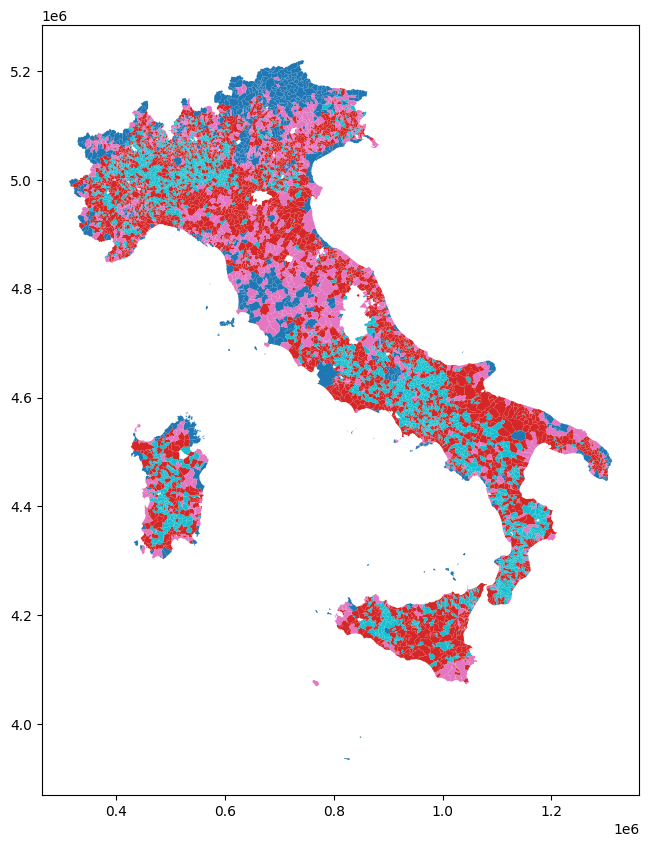

In [58]:
ax = gdf1.plot(figsize=(20,10), column = 'tourism_class_2024')

In [59]:
gdf1.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
df_wm = gdf1.to_crs(epsg=3857)

In [ ]:
ax = df_wm.plot(figsize=(20, 10), alpha = 0.8, column = 'tourism_score', cmap = 'OrRd')
cx.add_basemap(ax, source = cx.providers.OpenStreetMap.HOT, zoom = 8)
ax.set_axis_off()

fig = ax.get_figure()
fig.set_dpi(300)

In [ ]:
# m = df_wm.explore(column="tourism_score")
# m.save("interactive_map.html")